In [2]:
# インストール済のライブラリ一覧
library()

In [5]:
#ライブラリのインストール
install.packages("fUnitRoots")

also installing the dependencies ‘spatial’, ‘gss’, ‘stabledist’, ‘timeSeries’, ‘fBasics’, ‘urca’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(fUnitRoots)

Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


In [8]:
data=read.table("tsdata.txt", header=T)
head(data,5)

date,topix,exrate,indprod
Jan-75,276.09,29.13,47.33
Feb-75,299.81,29.70,46.86
Mar-75,313.50,29.98,46.24
Apr-75,320.57,29.80,47.33
May-75,329.65,29.79,47.33


In [10]:
# topixの収益率 (対数階差 * 100)
tprate = diff(log(data$topix)) * 100

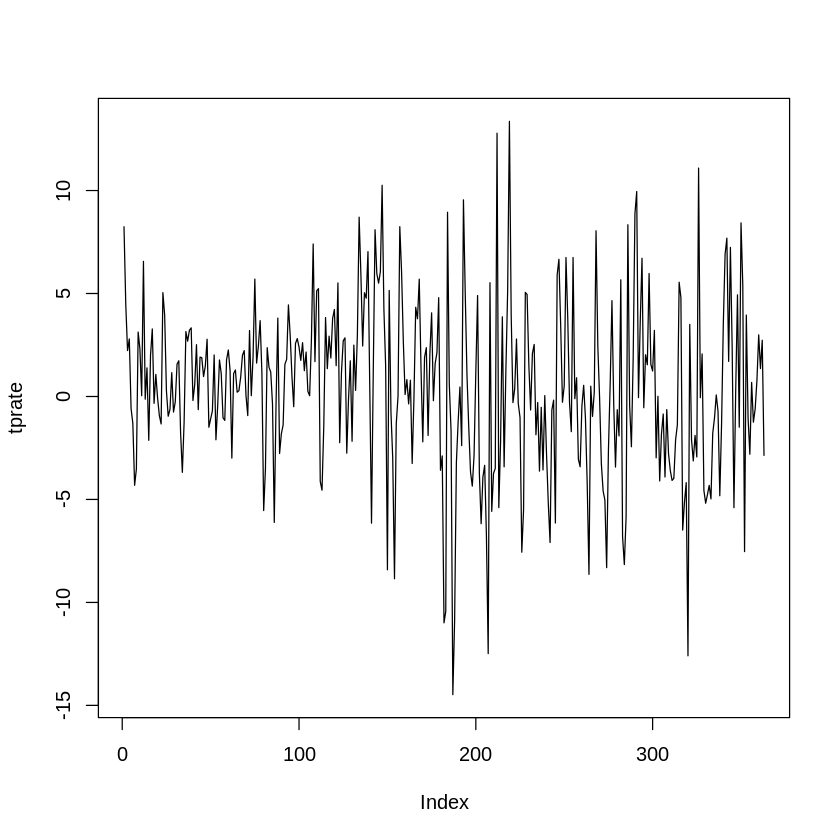

In [12]:
plot(tprate, type="l")
# 結果　トレンドは存在しない

In [13]:
#DFテスト
utres = unitrootTest(tprate, type="c", lags=0)

In [14]:
utres@test

$data.name
[1] "tprate"

$regression

Call:
lm(formula = y.diff ~ y.lag.1 + 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2057  -2.5007  -0.0439   2.0718  13.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24877    0.20676   1.203     0.23    
y.lag.1     -0.69166    0.04991 -13.859   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.915 on 360 degrees of freedom
Multiple R-squared:  0.3479,	Adjusted R-squared:  0.3461 
F-statistic: 192.1 on 1 and 360 DF,  p-value: < 2.2e-16


$statistic
       DF 
-13.85921 

$p.value
           t            n 
1.177472e-26 5.092225e-02 

$parameter
Lag Order 
        0 


In [15]:
#DFp検定統計量
length(tprate) * -0.69166

[1] -251.0726

In [17]:
# ADF検定 AR(3)
utres2 = unitrootTest(tprate, type="c", lags=2)

In [18]:
utres2@test

$data.name
[1] "tprate"

$regression

Call:
lm(formula = y.diff ~ y.lag.1 + 1 + y.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3941  -2.4968   0.0037   2.1009  13.6406 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24403    0.20913   1.167    0.244    
y.lag.1     -0.69709    0.07270  -9.589   <2e-16 ***
y.diff.lag1  0.01293    0.06395   0.202    0.840    
y.diff.lag2 -0.02552    0.05280  -0.483    0.629    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.933 on 356 degrees of freedom
Multiple R-squared:  0.3479,	Adjusted R-squared:  0.3424 
F-statistic:  63.3 on 3 and 356 DF,  p-value: < 2.2e-16


$statistic
       DF 
-9.588849 

$p.value
           t            n 
2.516811e-16 1.465056e-01 

$parameter
Lag Order 
        2 


In [20]:
formatC(2.516811e-16, format = "fg")

[1] "0.0000000000000002517"